In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
np.random.seed(123)

In [2]:
X = np.arange(15, dtype=float).T
y = np.arange(15, dtype=float)

#X = np.array([13, 8, 11, 2, 6], dtype=float).T
#y = np.array([3, 6, 7, 8, 11], dtype=float)

X = np.stack((np.ones(X.shape[0]), X), axis=1)

noise = np.random.normal(0.4, 0.6, y.shape)
y += noise

In [3]:
print(X)
print(y)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]]
[-0.25137836  1.99840727  2.5697871   2.49622317  4.05283985  6.39086192
  4.94399245  7.14265242  9.15956176  8.87995576  9.99266831 11.34317462
 13.29483378 13.0166588  14.13361082]


In [4]:
lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)

In [5]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

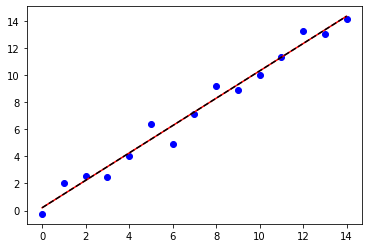

In [6]:
plt.scatter(X[:,1], y, c='blue')
plt.plot(X[:,1], X @ w, c='r')
plt.plot(X[:,1], y_hat, c='black', linestyle='dashed')

In [7]:
df = pd.read_csv("data/melb_data.csv")
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [8]:
df.drop(["Address", \
         "Method", \
         "CouncilArea", \
         "Regionname",  \
         "Suburb",  \
         "SellerG", \
         "Date", \
         "BuildingArea", \
         "YearBuilt", \
         "Distance", \
         "Propertycount", \
         "Bedroom2"], inplace=True, axis=1)
df.dropna(inplace=True)

In [9]:
df.tail()

,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude
13575,4,h,1245000.0,3150.0,2.0,2.0,652.0,-37.90562,145.16761
13576,3,h,1031000.0,3016.0,2.0,2.0,333.0,-37.85927,144.87904
13577,3,h,1170000.0,3016.0,2.0,4.0,436.0,-37.85274,144.88738
13578,4,h,2500000.0,3016.0,1.0,5.0,866.0,-37.85908,144.89299
13579,4,h,1285000.0,3013.0,1.0,1.0,362.0,-37.81188,144.88449


In [10]:
X = df.drop("Price", axis=1) 
y = df["Price"]

In [11]:
y.tail()

13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, dtype: float64

In [12]:
le = dict()
for f in ["Postcode", "Type"]:
    le[f] = LabelEncoder().fit(X[f])
    X[f] = le[f].transform(X[f])

In [19]:
lr = LinearRegression()
lr.fit(X, y)
# Rooms, Type, Postcode, Bathroom, Car, Landsize, Lat, Long
# https://www.realestate.com.au/property-house-vic-pascoe+vale+south-139192615
# data: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
our_house = np.array([4,\
                      le["Type"].transform(["h"]), \
                      le["Postcode"].transform([3044]), \
                      2, \
                      6, \
                      584.0, \
                      -37.738569,144.939165\
                      ], dtype=object).reshape(1, -1)
lr.predict(our_house)

/home/sina/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1265327.81057374])